<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks/blob/main/Time_Dependent_Fractal_Schrodinger_Equation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import hbar, pi
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

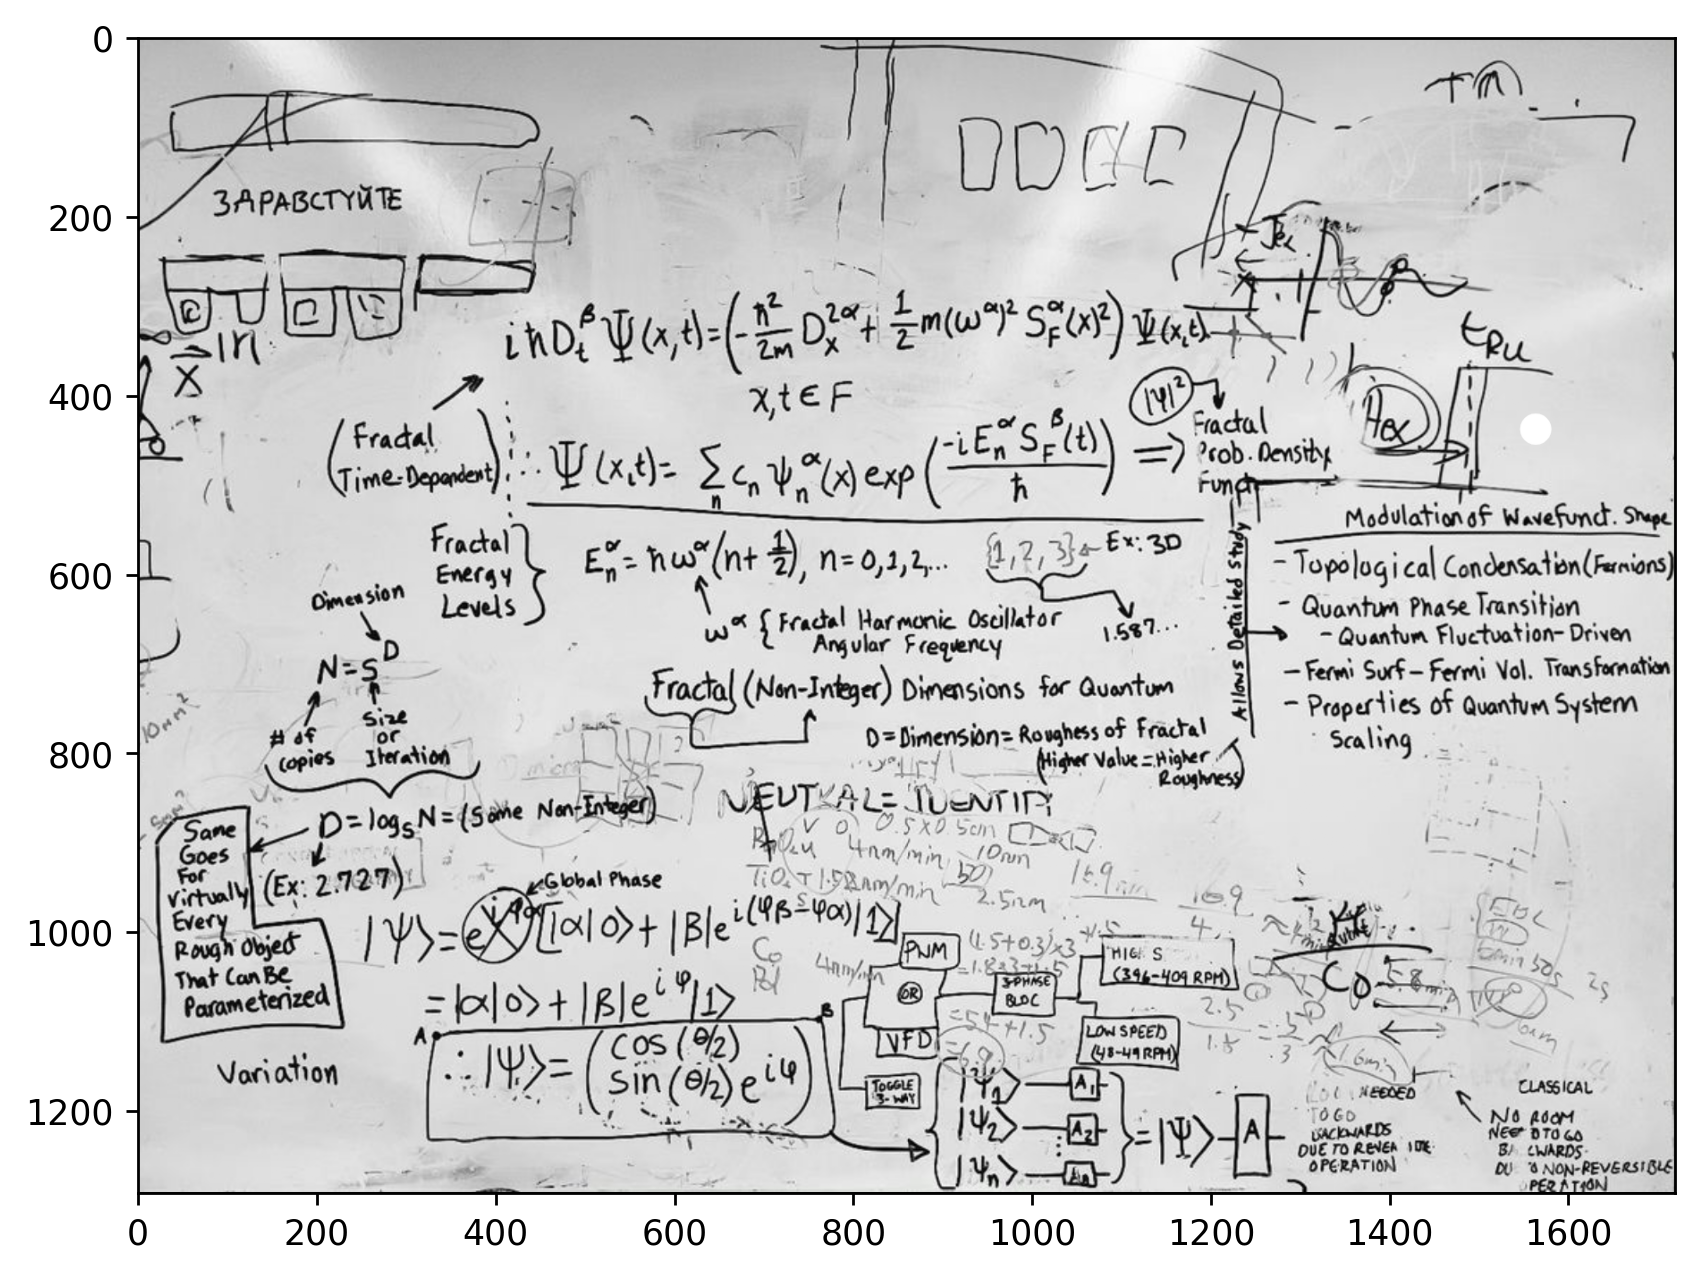

In [4]:
image_path = 'FTDSE.png'

plt.figure(figsize=(8,6), dpi=250)

# Read and display the image
img = mpimg.imread(image_path)
imgplot = plt.imshow(img)
plt.show()

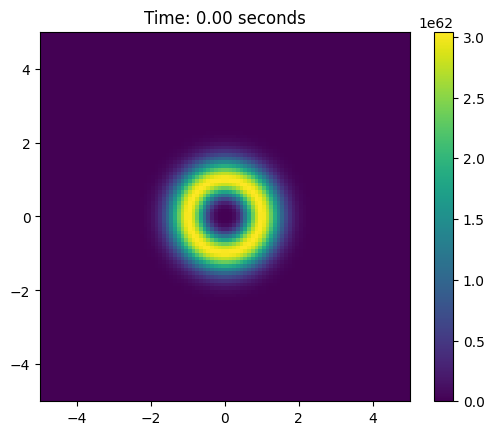

<ipython-input-5-3f716f7d3221>:33: RuntimeWarning: overflow encountered in divide
  next_psi = psi - 1j * H_psi * dt / hbar
<ipython-input-5-3f716f7d3221>:28: RuntimeWarning: invalid value encountered in multiply
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
<ipython-input-5-3f716f7d3221>:28: RuntimeWarning: invalid value encountered in subtract
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
<ipython-input-5-3f716f7d3221>:28: RuntimeWarning: invalid value encountered in add
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
<ipython-input-5-3f716f7d3221>:28: RuntimeWarning: overflow encountered in divide
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
<ipython-input-5-3f716f7d3221>:28: RuntimeWarning: invalid value encountered in divide
  laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) 

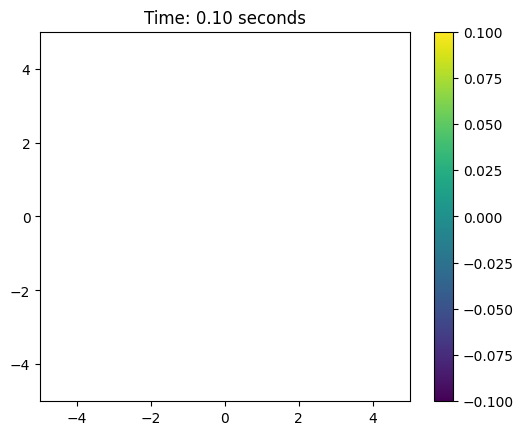

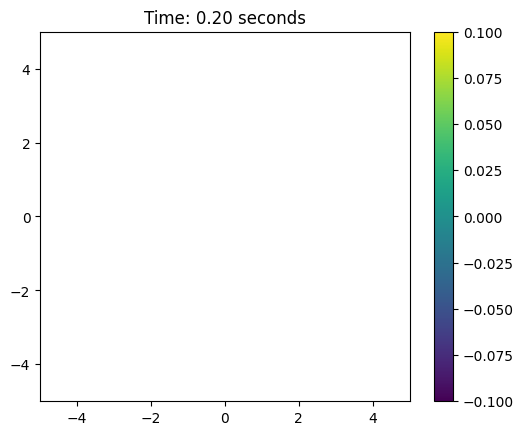

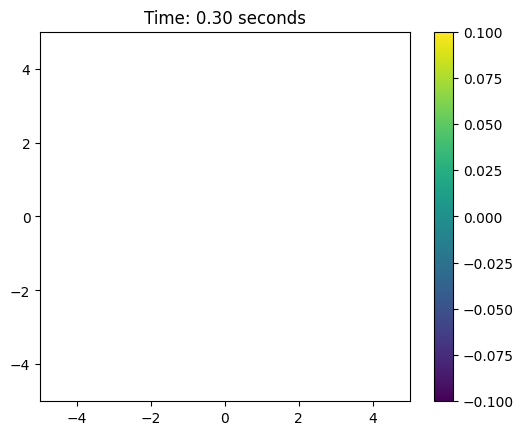

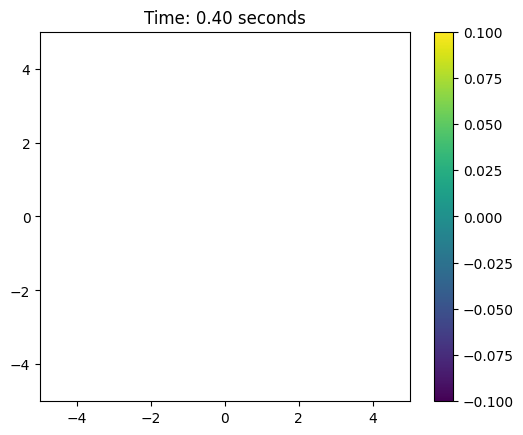

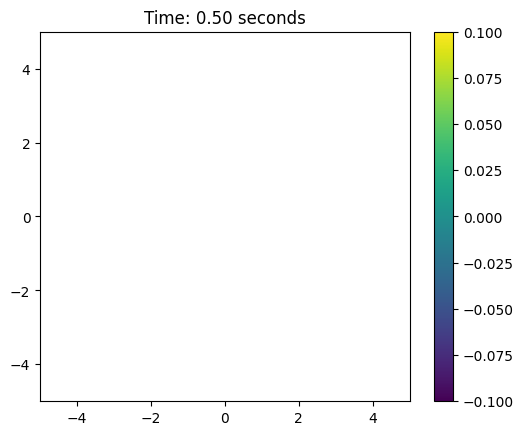

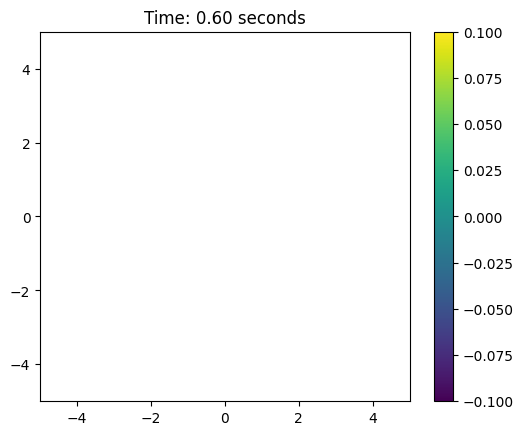

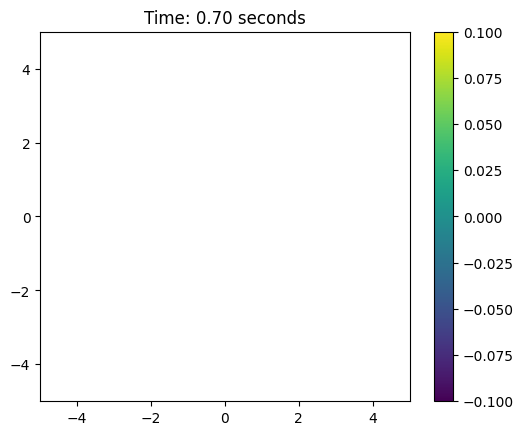

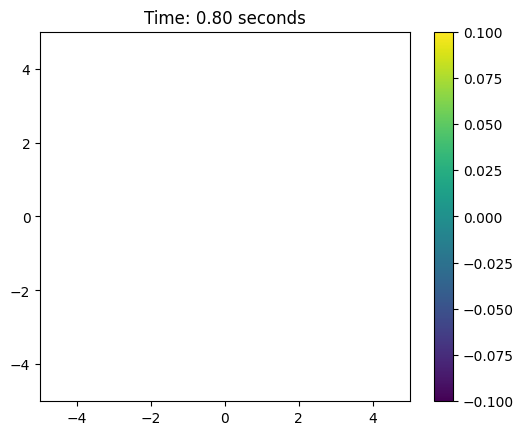

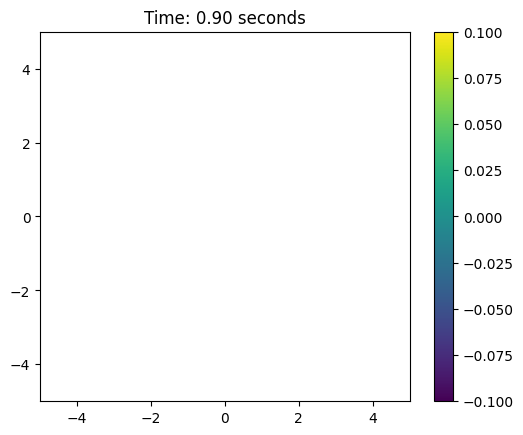

In [5]:

# Constants
m = 1.0  # Mass of the particle
dx = 0.1  # Space step
dt = 0.01  # Time step
size = 100  # Size of the space grid
time_steps = 100  # Number of time steps to evolve

# Potential function V(x, y)
def V(x, y):
    return 0.5 * m * (x**2 + y**2)  # Harmonic oscillator potential

# Create a grid
x = np.linspace(-5, 5, size)
y = np.linspace(-5, 5, size)
X, Y = np.meshgrid(x, y)

# Initial wave function ψ(x, y, t=0)
def initial_wave_function(X, Y):
    return np.exp(-(X**2 + Y**2))

# Initialize wave function
psi = initial_wave_function(X, Y)

# Time evolution function
def evolve(psi, V, dt, dx, m):
    # Compute the Laplacian
    # For standard dimensions, we use a finite difference approximation
    laplacian_psi = (np.roll(psi, 1, axis=0) - 2 * psi + np.roll(psi, -1, axis=0)) / dx**2 \
                  + (np.roll(psi, 1, axis=1) - 2 * psi + np.roll(psi, -1, axis=1)) / dx**2

    # Compute the next time step ψ(x, y, t+dt)
    H_psi = - (hbar**2 / (2 * m)) * laplacian_psi + V(X, Y) * psi
    next_psi = psi - 1j * H_psi * dt / hbar
    return next_psi

# Evolve the wave function over the specified number of time steps
for t in range(time_steps):
    psi = evolve(psi, V, dt, dx, m)
    if t % 10 == 0:  # Plot every 10 steps
        plt.imshow(abs(psi)**2, extent=(x.min(), x.max(), y.min(), y.max()))
        plt.title(f"Time: {t * dt:.2f} seconds")
        plt.colorbar()
        plt.show()

# Calculate probability density
probability_density = abs(psi)**2


In [6]:
from scipy.constants import hbar, m_e, pi
from scipy.sparse import diags
from scipy.linalg import eigh_tridiagonal

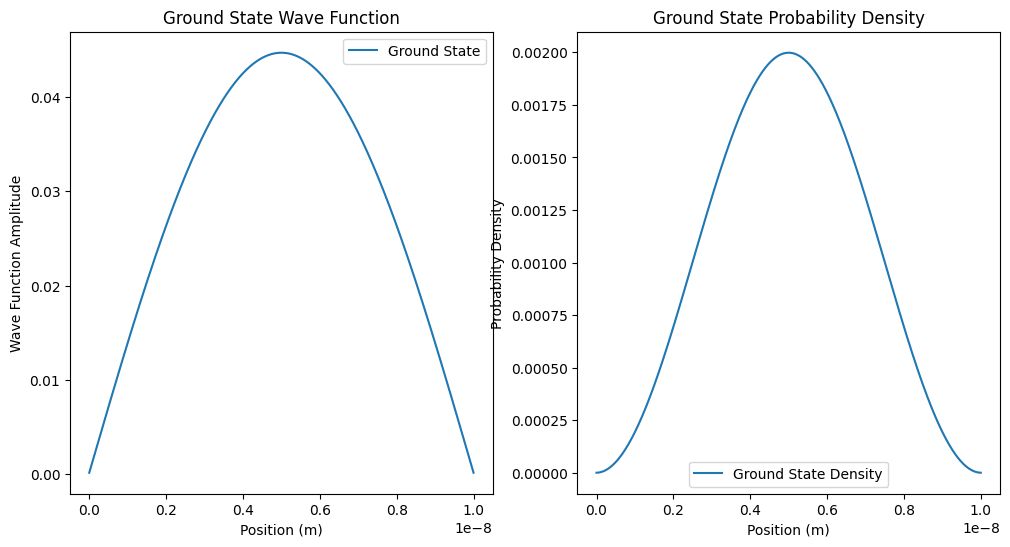

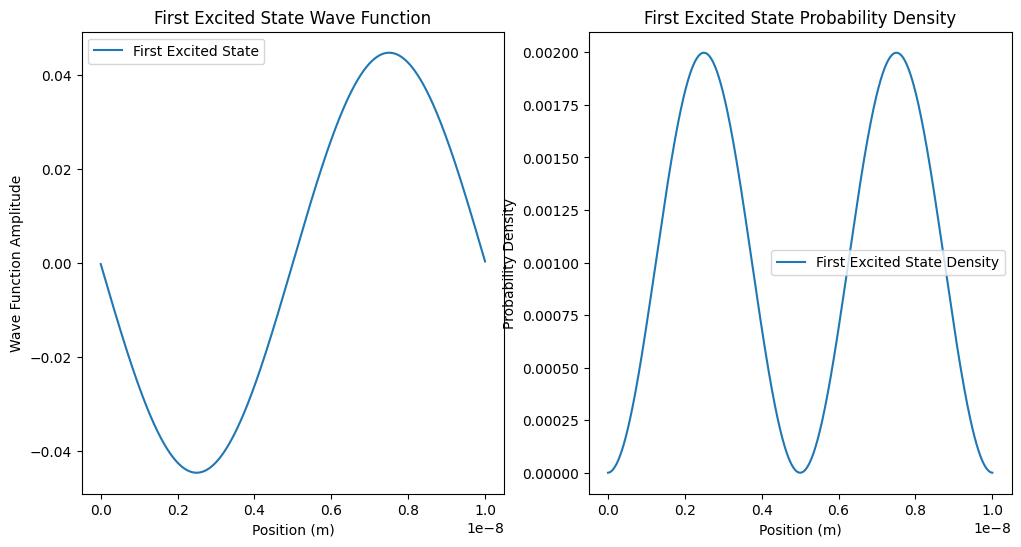

In [7]:
# Constants (in SI units for simplicity)
m = m_e  # Mass of the electron
L = 1e-8  # Size of the well in meters
N = 1000  # Number of points in the grid
x = np.linspace(0, L, N)  # Position coordinates
dx = x[1] - x[0]  # Delta x

# Potential well function V(x)
V = np.zeros(N)  # A simple square well potential

# Kinetic energy operator T
diagonal = np.ones(N) / dx**2
off_diagonal = -0.5 * np.ones(N-1) / dx**2
T = (hbar**2 / (2 * m)) * diags([diagonal, off_diagonal, off_diagonal], [0, -1, 1])

# Solve for eigenvalues and eigenvectors
eigenvalues, eigenvectors = eigh_tridiagonal(diagonal, off_diagonal)

# Ground state and first excited state wave functions
ground_state_wave_function = eigenvectors[:, 0]
first_excited_state_wave_function = eigenvectors[:, 1]

# Probability densities
ground_state_density = abs(ground_state_wave_function)**2
first_excited_state_density = abs(first_excited_state_wave_function)**2

# Plot the ground state wave function and probability density
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, ground_state_wave_function, label="Ground State")
plt.title("Ground State Wave Function")
plt.xlabel("Position (m)")
plt.ylabel("Wave Function Amplitude")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, ground_state_density, label="Ground State Density")
plt.title("Ground State Probability Density")
plt.xlabel("Position (m)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

# Plot the first excited state wave function and probability density
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x, first_excited_state_wave_function, label="First Excited State")
plt.title("First Excited State Wave Function")
plt.xlabel("Position (m)")
plt.ylabel("Wave Function Amplitude")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, first_excited_state_density, label="First Excited State Density")
plt.title("First Excited State Probability Density")
plt.xlabel("Position (m)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()